# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def ring(r_min = 0, r_max = 1, n_samples=3600):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

Text(0.5, 1.0, 'Distribución de anillos')

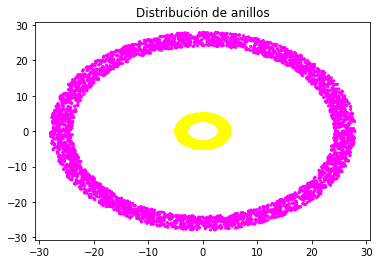

In [15]:
data1 = ring(3, 5)
data2 = ring(24, 28)
data=np.concatenate([data1, data2], axis=0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s=5, cmap="spring_r")
plt.title("Distribución de anillos")

# Algoritmo con Kmeans

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(2).fit(data)

In [18]:
clust = km.predict(data)

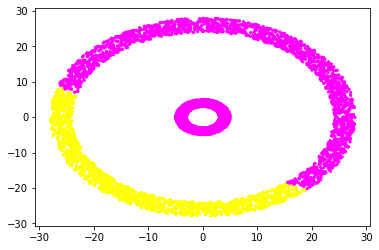

In [19]:
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="spring_r")

El método de k means es incapaz de crear dos clusters naturales en anillo concétricos. Pues básicamente hay puntos que están a la misma distancia del anillo interno como la del externo. Entonces este ejemplo sugiere que el algoritmo de los **KMeans** no funciona para algunos casos.

## Algoritmo de los K Medoides

In [20]:
from pyclust import KMedoids

In [21]:
kmed = KMedoids(2).fit_predict(data)

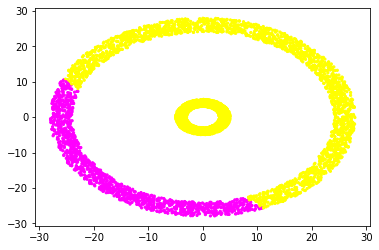

In [23]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="spring_r")

## Algoritmo del clustering espectral

In [24]:
from sklearn.cluster import SpectralClustering

In [25]:
spectral = SpectralClustering(2).fit_predict(data)

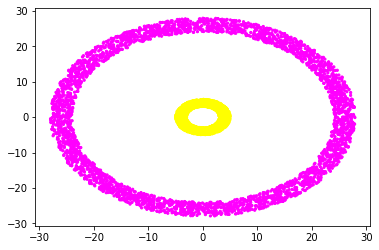

In [26]:
plt.scatter(data[:,0], data[:,1], c=spectral, s=5, cmap="spring_r")

* Podemos estimar la k:
    * NO: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering Aglomerativo
                * No: Clustering Espectral
        

Spectral clustering is a kind of clustering algorithm based on graph theory. By spectral graph partition theory [10], the clustering problem of the data set is transformed into the graph partition problem. In spectral clustering, each data point is regarded as the vertex of the graph, and the similarity between data points is regarded as the weight of the edge. By dividing the graph, the sum of the weight of the edge in the subgraph is as high as possible, and the sum of the weight of the edge between different subgraphs is as low as possible.
The spectral clustering algorithm uses the eigenvectors of the Laplacian matrix corresponding to the data set to cluster. In the spectral clustering algorithm, firstly, an undirected graph  is constructed according to the data points. Each vertex  on the graph corresponds to a data point, and the weight  on the edge is the similarity between the data points. In general, we use Gaussian kernel function to construct the similar matrix. Then, we can get a degree matrix , whose main diagonal element is equal to the sum of the row elements corresponding to the similar matrix. There are usually three ways to construct the Laplacian matrix : (1) denormalized Laplacian matrix, (2) normalized symmetric Laplacian matrix , and (3) normalized asymmetric Laplacian matrix . The eigenvector  corresponding to the first k eigenvalues of the Laplace matrix can be calculated and set . Then, a new feature matrix  is obtained by normalizing . Each row in the feature matrix  is regarded as a sample, which is clustered to obtain a group of clusters . NJW algorithm [14] is the most commonly used spectral clustering algorithm. The basic step of the NJW algorithm is shown in Algorithm 1.

## Propagación de la afinidad

In [148]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

In [149]:
 def report_affinity_propagation(X):
    af = AffinityPropagation(random_state=1, preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    clust_labels = af.labels_
    n_clust = len(cluster_center_ids)
    
    print("Número estimado de clusters: %d" %n_clust)
    print("Homogeneidad: %0.3f" %metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f" %metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f" %metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f" %metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f" %metrics.adjusted_mutual_info_score(labels,clust_labels))
    print("Coeficiente de la silueta: %0.3f" %metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_member = (clust_labels == k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_member,0], X[class_member, 1], col + '.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_member]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], col)
    plt.title("Número estimado de clusters %d" %n_clust)
    plt.show()

Número estimado de clusters: 41
Homogeneidad: 1.000
Completitud: 0.198
V-measure: 0.330
R2 ajustado: 0.071
Información mútua ajustada: 0.321
Coeficiente de la silueta: 0.231


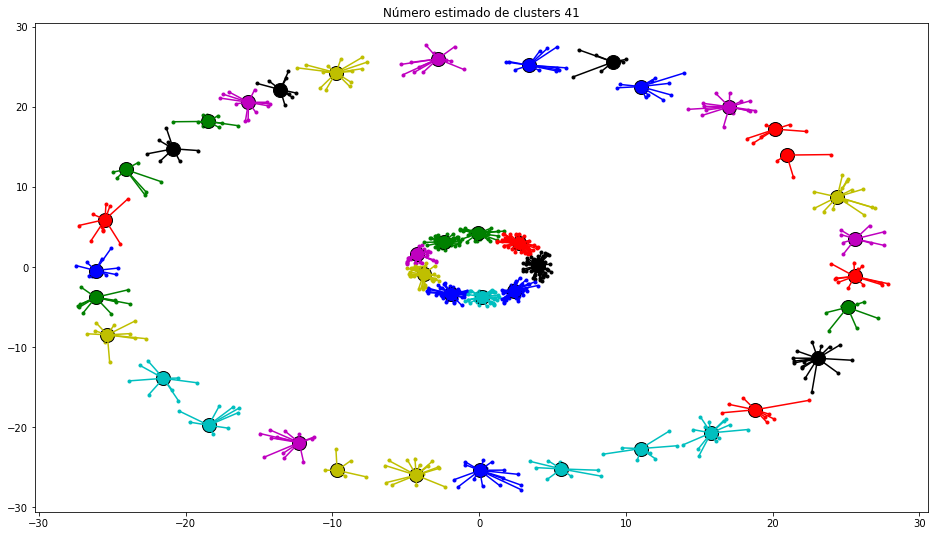

In [150]:
report_affinity_propagation(data)

Como vemos este método no sirve para distribuciones en anillo natural.